In [ ]:
sigma = matrix([[2.3, 0, 0, 0],
           [0, 1.5, 0, 0],
           [0, 0, 1.7, 0],
           [0, 0,   0, 2]
          ])
# mean vector
mu = array([2,3,8,10])

# input
x = array([2.1,3.5,8, 9.5])

def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")

        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = matrix(x - mu)
        inv = sigma.I        
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")

print norm_pdf_multivariate(x, mu, sigma)


9

In [15]:
sigma=np.array([[1,2],[4,5]])
mu=np.array([1,1])
x=np.array([2,3])
inver=np.linalg.inv(sigma)

np.matmul(np.matmul((x-mu).T,inver),(x-mu))

1.0

In [23]:
import numpy as np
import pandas as pd

import math

In [39]:
# sigma=np.array([[1,2],[4,5]])
# mu=[1,1]
# x=[1,1]

# def multivariate_gaussian(x,mu,sigma):
#     deter=np.linalg.det(sigma)
#     if deter==0:
#         print("Determinant of the system is zero")
#         return False
    
    
#     inver=np.linalg.inv(sigma)
#     dimension=len(mu)
    
#     const=1/((2*math.pi)**(dimension/2)*deter**0.5)
#     exponent=-1/2*np.matmul(np.matmul((x-mu).T,inver),(x-mu))
#     return const*math.exp(exponent)

def calculate_gaussian_prob(x,mu,sigma):
    dimension=len(x)
    if dimension == len(mu) and (dimension,dimension)== sigma.shape:
        deter=np.linalg.det(sigma)
        if deter==0:
            raise NameError("The covariance matrix can't be singular")
        inver=np.linalg.inv(sigma)
        const=1/((2*math.pi)**(float(dimension)/2)*deter**0.5)
        exponent=-1/2*np.matmul(np.matmul((x-mu).T,inver),(x-mu))
        return const*math.exp(exponent)
    else:
        raise NameError("The dimension of input doesnot match")

In [40]:
x = np.array([0,0])
mu  = np.array([0,0])
cov = np.array([[1,0],[0,1]] )

print(calculate_gaussian_prob(x, mu, cov))

# prints 0.15915494309189535

0.15915494309189535


In [41]:
import numpy as np
X = np.array([[13.04681517, 14.74115241],[13.40852019, 13.7632696 ],[14.19591481, 15.85318113],[14.91470077, 16.17425987]])

def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

mu,sigma = est_gaus_par(X)
mu,sigma

(array([13.89148773, 15.13296575]), array([0.72221364, 0.95296759]))

In [42]:
d= np.array([[1,2,1],[2,1,3],[4,5,4],[2,2,1]])

In [48]:
mean = np.average(d , axis=0)

# OR
# mean=np.average(d , axis=0)
# mean.shape

cov = 0
for e in d:
    cov += np.dot((e-mean).reshape(len(e), 1), (e-mean).reshape(1, len(e)))
    print(cov)
if len(d)<30:
    cov /= (len(d)-1)
else:
    cov /= len(d)
cov.shape

[[1.5625 0.625  1.5625]
 [0.625  0.25   0.625 ]
 [1.5625 0.625  1.5625]]
[[ 1.625  1.     1.375]
 [ 1.     2.5   -0.5  ]
 [ 1.375 -0.5    2.125]]
[[4.6875 5.375  4.4375]
 [5.375  8.75   3.875 ]
 [4.4375 3.875  5.1875]]
[[4.75 5.5  4.75]
 [5.5  9.   4.5 ]
 [4.75 4.5  6.75]]


(3, 3)

(60000, 2) (140000, 2)
0.3 0.7


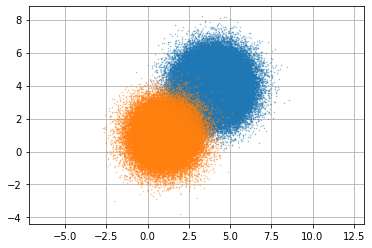

[[1 1]
 [4 4]] [[[1 0]
  [0 1]]

 [[1 0]
  [0 1]]] [0.3 0.7]


In [143]:
# mus=np.array([[1,1],[4,4]])
# sigmas=np.array([[[1,0],[0,1]],[[4,0],[0,8]]])
# numbers=np.array([100,200])
# total_data=np.sum(numbers)
# priors=numbers/total_data
# priors


mean1 = [1,1]
cov1 = [[1,0],[0,1]]
mean2 = [4,4]
cov2 = [[1,0],[0,1]]
data1 = np.random.multivariate_normal(mean1, cov1, 60000)
y1 = np.zeros(60000)
data2 = np.random.multivariate_normal(mean2, cov2, 140000)
y2 = np.ones(140000)
X =np.vstack((data1,data2))
y =np.hstack((y1,y2))
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)
### code for plotting
plt.plot(data2[:, 0], data2[:, 1], '.', alpha=0.5, markersize=1)
plt.plot(data1[:, 0], data1[:, 1], '.', alpha=0.5, markersize=1)
plt.axis('equal')
plt.grid()
plt.show()

mus=np.array([mean1,mean2])
sigmas=np.array([cov1,cov2])
priors=np.array([priory0,priory1])
print(mus,sigmas,priors)

In [154]:
class multi_case_1():
    def __init__ (self,mus,sigmas,priors):
        self.mus=mus
        self.sigmas=sigmas
        self.priors=priors
        values=self.calculate_case_1()
        print(f"Paramter Values calculated: ", values)
        return None
    
    def calculate_case_1(self):
        mu_diff=(self.mus[0]-self.mus[1])
        self.w= mu_diff
        self.x0= 1/2 * (self.mus[0]+self.mus[1]) - (self.sigmas[0][0]**2)/(np.linalg.norm(mu_diff))*(math.log(priors[0]/priors[1])*mu_diff)
        return self.w,self.x0
    
    def decision_boundry_fn(self,x):
        return np.matmul(self.w.T, (x-self.x0))
    
    def predict(self,X):
        op_data=[np.matmul(self.w.T, (x-self.x0)) for x in X]
        to_ret=[0 if x>0 else 1 for x in op_data]
        return to_ret



# def calculate_case_1(mus,sigma,priors):
#     dimension=len(mus[0])
#     if (dimension,dimension) != sigma.shape:
#         return NameError("Dimension mismatch")
#     mu_dff=(mus[0]-mus[1])
#     w= mu_diff
#     x0= 1/2 * (mus[0]+mus[1]) - (sigma[0][0]**2)/(np.linalg.norm(mu_diff))*(math.ln(prior[0]/prior[1])**mu_diff)
#     return w,x0


In [155]:
model1=multi_case_1(mus,sigmas,priors)

Paramter Values calculated:  (array([-3, -3]), array([1.90086994, 2.5       ]))


shape of x_in, (1000000, 2)
doing binary classifcation...


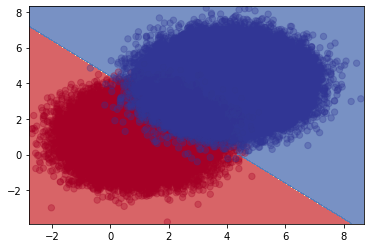

In [165]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions using the trained model
    print(f"shape of x_in, {x_in.shape}")
    y_pred = model.predict(x_in)
    y_pred=[[x] for x in y_pred]
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
plot_decision_boundary(model1,X,y)

In [95]:
# mean = [0, 0]

# cov = [[1, 0], [0, 100]] 
# import matplotlib.pyplot as plt

# x, y = np.random.multivariate_normal(mean, cov, 5000).T

# plt.plot(x, y, 'x')

# plt.axis('equal')

# plt.show()


In [127]:
class multi_case_3():
    def __init__ (self,mus,sigmas,priors):
        self.mus=mus
        self.sigmas=sigmas
        self.priors=priors
        values=self.calculate_case_3_constants()
        print(f"Paramter Values calculated: ", values)
        
        return None
    
    def calculate_case_3_constants(self):
        dimension=len(self.mus[0])
        print(self.sigmas.shape)
        if (dimension,dimension) != self.sigmas[0].shape:
            return NameError("Dimension mismatch")
        mu1=self.mus[0]
        mu2=self.mus[1]
        sigma1=self.sigmas[0]
        sigma2=self.sigmas[1]
        sigma1_inv=np.linalg.inv(sigma1)
        sigma2_inv=np.linalg.inv(sigma2)
        prior1=self.priors[0]
        prior2=self.priors[1]
        self.W12=-1/2*sigma1_inv
        self.W22=-1/2*sigma2_inv
        self.w11=np.matmul(sigma1_inv,mu1)
        self.w21=np.matmul(sigma2_inv,mu2)
        self.w10=-1/2*np.matmul(np.matmul(mu1.T,sigma1_inv),mu1) - 1/2*np.log(np.linalg.det(sigma1)) + np.log(priors[0])
        self.w20=-1/2*np.matmul(np.matmul(mu1.T,sigma1_inv),mu1) - 1/2*np.log(np.linalg.det(sigma1)) + np.log(priors[0])
        return self.W12,self.W22,self.w11,self.w21,self.w10,self.w20
    
    def decision_boundry_fn(self,x):
        return np.matmul(np.matmul(x.T,(self.W12-self.W22)), x) + np.matmul((self.w11.T-self.w21.T),x) + (self.w10-self.w20) 
    
    def predict(self,X):
        op_data=[np.matmul(np.matmul(x.T,(self.W12-self.W22)), x) + np.matmul((self.w11.T-self.w21.T),x) + (self.w10-self.w20) for x in X]
        to_ret=[1 if x>0 else 0 for x in op_data]
        return to_ret
        
        
        

(60000, 2) (140000, 2)
0.3 0.7


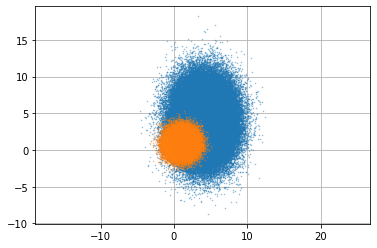

[[1 1]
 [4 4]] [[[1 0]
  [0 1]]

 [[4 0]
  [0 8]]] [0.3 0.7]


In [166]:
# mus=np.array([[1,1],[4,4]])
# sigmas=np.array([[[1,0],[0,1]],[[4,0],[0,8]]])
# numbers=np.array([100,200])
# total_data=np.sum(numbers)
# priors=numbers/total_data
# priors


mean1 = [1,1]
cov1 = [[1,0],[0,1]]
mean2 = [4,4]
cov2 = [[4,0],[0,8]]
data1 = np.random.multivariate_normal(mean1, cov1, 60000)
y1 = np.zeros(60000)
data2 = np.random.multivariate_normal(mean2, cov2, 140000)
y2 = np.ones(140000)
X =np.vstack((data1,data2))
y =np.hstack((y1,y2))
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)
### code for plotting
plt.plot(data2[:, 0], data2[:, 1], '.', alpha=0.5, markersize=1)
plt.plot(data1[:, 0], data1[:, 1], '.', alpha=0.5, markersize=1)
plt.axis('equal')
plt.grid()
plt.show()

mus=np.array([mean1,mean2])
sigmas=np.array([cov1,cov2])
priors=np.array([priory0,priory1])
print(mus,sigmas,priors)

In [169]:
model3=multi_case_3(mus,sigmas,priors)
val=model3.decision_boundry_fn(np.array([1,1]))
classifier=model3
val

(2, 2, 2)
Paramter Values calculated:  (array([[-0.5, -0. ],
       [-0. , -0.5]]), array([[-0.125 , -0.    ],
       [-0.    , -0.0625]]), array([1., 1.]), array([1. , 0.5]), -2.203972804325936, -2.203972804325936)


-0.3125

shape of x_in, (1000000, 2)
doing binary classifcation...


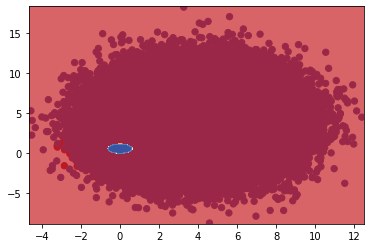

In [172]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions using the trained model
    print(f"shape of x_in, {x_in.shape}")
    y_pred = model.predict(x_in)
    y_pred=[[x] for x in y_pred]
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
plot_decision_boundary(classifier,X,y)